In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import splitfolders

2024-02-04 18:18:05.738338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 18:18:05.738425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 18:18:06.224106: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-04 18:18:07.132974: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-04 18:18:10.045623: W tensorflow/compiler/tf2

In [2]:
splitfolders.ratio('Test', output="output2", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 412923 files [11:23, 604.47 files/s] 


In [5]:
IMAGE_SIZE = 140
CHANNELS = 3

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'output2/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        #save_to_dir="AugmentedImages"
)

Found 330230 images belonging to 300 classes.


In [8]:
train_generator.class_indices

{'10197 Technic, Axle and Pin Connector Hub with 2 Perpendicular Axles': 0,
 '10201 Bracket 1 x 2 - 1 x 4 with Rounded Corners': 1,
 '10247 Plate Special 2 x 2 with 1 Pin Hole [Complete Underside Rib]': 2,
 '10314 Slope, Curved 1 x 4 x 1 13': 3,
 '10928 Technic, Gear 8 Tooth with Dual Face': 4,
 '11090 Bar Holder with Clip': 5,
 '11153 Slope, Curved 4 x 1': 6,
 '11211 Brick, Modified 1 x 2 with Studs on 1 Side': 7,
 '11212 Plate 3 x 3': 8,
 '11213 Plate, Round 6 x 6 with Hole': 9,
 '11214 Technic, Axle 1L with Pin 2L with Friction Ridges': 10,
 '11215 Bracket 5 x 2 x 1 13 with 2 Holes': 11,
 '11272 Technic, Axle Connector 2 x 3 Quadruple': 12,
 '11458 Plate, Modified 1 x 2 with Pin Hole on Top': 13,
 '11476 Plate, Modified 1 x 2 with Clip on Side (Horizontal Grip)': 14,
 '11477 Slope Curved 2 x 1 No Studs [12 Bow]': 15,
 '11478 Technic, Liftarm Thin 1 x 5 - Axle Holes': 16,
 '13349 Wedge 4 x 4 Triple Inverted with Connections between 4 Studs': 17,
 '13547 Slope, Curved 4 x 1 Inverted':

In [9]:
class_names = list(train_generator.class_indices.keys())
class_names

['10197 Technic, Axle and Pin Connector Hub with 2 Perpendicular Axles',
 '10201 Bracket 1 x 2 - 1 x 4 with Rounded Corners',
 '10247 Plate Special 2 x 2 with 1 Pin Hole [Complete Underside Rib]',
 '10314 Slope, Curved 1 x 4 x 1 13',
 '10928 Technic, Gear 8 Tooth with Dual Face',
 '11090 Bar Holder with Clip',
 '11153 Slope, Curved 4 x 1',
 '11211 Brick, Modified 1 x 2 with Studs on 1 Side',
 '11212 Plate 3 x 3',
 '11213 Plate, Round 6 x 6 with Hole',
 '11214 Technic, Axle 1L with Pin 2L with Friction Ridges',
 '11215 Bracket 5 x 2 x 1 13 with 2 Holes',
 '11272 Technic, Axle Connector 2 x 3 Quadruple',
 '11458 Plate, Modified 1 x 2 with Pin Hole on Top',
 '11476 Plate, Modified 1 x 2 with Clip on Side (Horizontal Grip)',
 '11477 Slope Curved 2 x 1 No Studs [12 Bow]',
 '11478 Technic, Liftarm Thin 1 x 5 - Axle Holes',
 '13349 Wedge 4 x 4 Triple Inverted with Connections between 4 Studs',
 '13547 Slope, Curved 4 x 1 Inverted',
 '13548 Wedge 2 x 2 (Slope 45 Corner)',
 '13731 Slope, Curved

In [11]:
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [12]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'output2/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 41159 images belonging to 300 classes.


In [13]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
        'output2/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 41534 images belonging to 300 classes.


In [14]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.72156864 0.72156864 0.72156864]
  [0.72156864 0.72156864 0.72156864]
  [0.72156864 0.72156864 0.72156864]
  ...
  [0.72156864 0.72156864 0.72156864]
  [0.72156864 0.72156864 0.72156864]
  [0.72156864 0.72156864 0.72156864]]

 [[0.72156864 0.72156864 0.72156864]
  [0.72156864 0.72156864 0.72156864]
  [0.72156864 0.72156864 0.72156864]
  ...
  [0.72156864 0.72156864 0.72156864]
  [0.72156864 0.72156864 0.72156864]
  [0.72156864 0.72156864 0.72156864]]

 [[0.72156864 0.72156864 0.72156864]
  [0.72156864 0.72156864 0.72156864]
  [0.72156864 0.72156864 0.72156864]
  ...
  [0.72156864 0.72156864 0.72156864]
  [0.72156864 0.72156864 0.72156864]
  [0.72156864 0.72156864 0.72156864]]

 ...

 [[0.7451075  0.7451075  0.7451075 ]
  [0.745327   0.745327   0.745327  ]
  [0.74554664 0.74554664 0.74554664]
  ...
  [0.74509805 0.74509805 0.74509805]
  [0.74509805 0.74509805 0.74509805]
  [0.74509805 0.74509805 0.74509805]]

 [[0.7490196  0.7490196  0.7490196 ]
  [0.7490196  0.7490196  0.7490196 ]


In [15]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 300

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

2024-02-04 18:59:33.447930: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14792 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0001:00:00.0, compute capability: 7.5


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 138, 138, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 69, 69, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 67, 67, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 33, 33, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=10000,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=1200,
    verbose=1,
    epochs=50,
)

Epoch 1/50
10000/10000 [==============================] - 1840s 184ms/step - loss: 3.1457 - accuracy: 0.2508 - val_loss: 2.7436 - val_accuracy: 0.3107
Epoch 2/50
10000/10000 [==============================] - 1803s 180ms/step - loss: 2.5186 - accuracy: 0.3620 - val_loss: 2.3570 - val_accuracy: 0.3900
Epoch 3/50
10000/10000 [==============================] - 1802s 180ms/step - loss: 2.2493 - accuracy: 0.4165 - val_loss: 2.1824 - val_accuracy: 0.4269
Epoch 4/50
10000/10000 [==============================] - 1802s 180ms/step - loss: 2.0736 - accuracy: 0.4527 - val_loss: 1.9966 - val_accuracy: 0.4666
Epoch 5/50
10000/10000 [==============================] - 1799s 180ms/step - loss: 1.9361 - accuracy: 0.4828 - val_loss: 1.8992 - val_accuracy: 0.4886
Epoch 6/50
10000/10000 [==============================] - 1796s 180ms/step - loss: 1.8493 - accuracy: 0.5024 - val_loss: 1.8208 - val_accuracy: 0.5081
Epoch 7/50
10000/10000 [==============================] - 1797s 180ms/step - loss: 1.7778 - ac

In [21]:
scores = model.evaluate(test_generator )

1298/1298 [==============================] - 225s 173ms/step - loss: 1.2845 - accuracy: 0.6370


In [22]:
scores

[1.2845404148101807, 0.6370202898979187]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

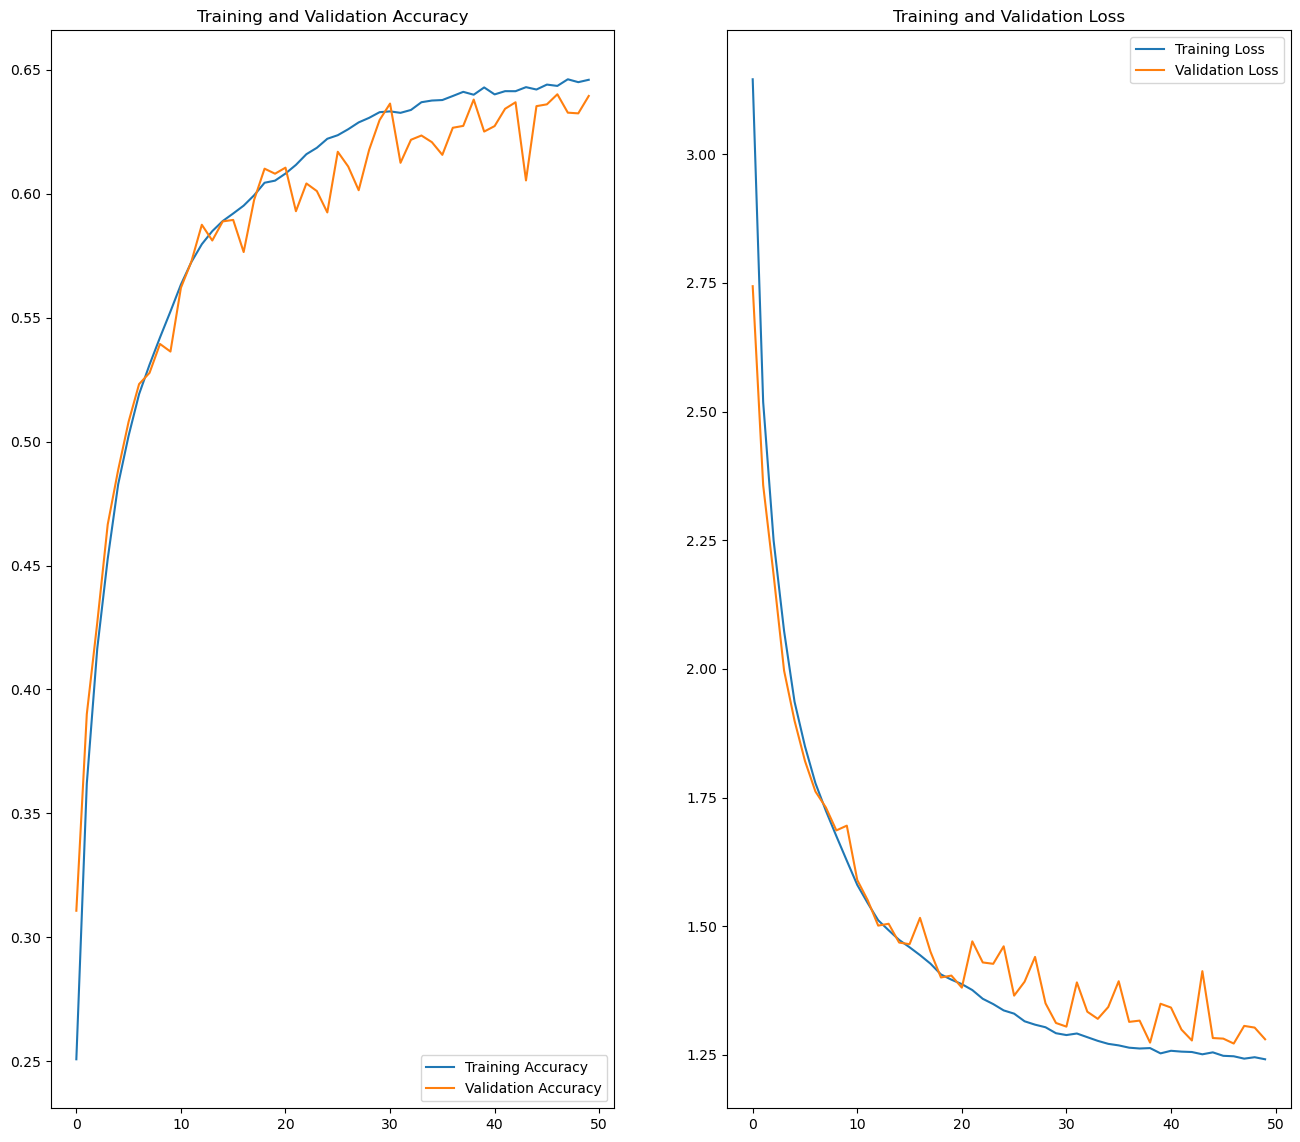

In [24]:
EPOCHS = 50

plt.figure(figsize=(16, 14))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: 11213 Plate, Round 6 x 6 with Hole
1/1 [==============================] - 0s 94ms/step
predicted label: 11213 Plate, Round 6 x 6 with Hole


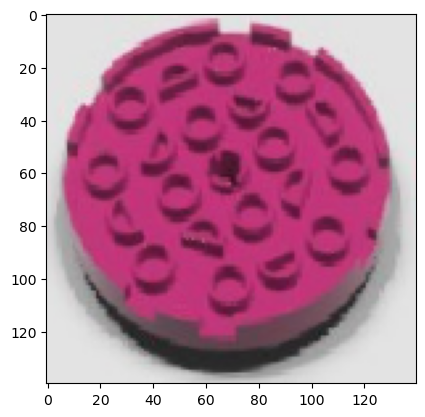

In [25]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [26]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


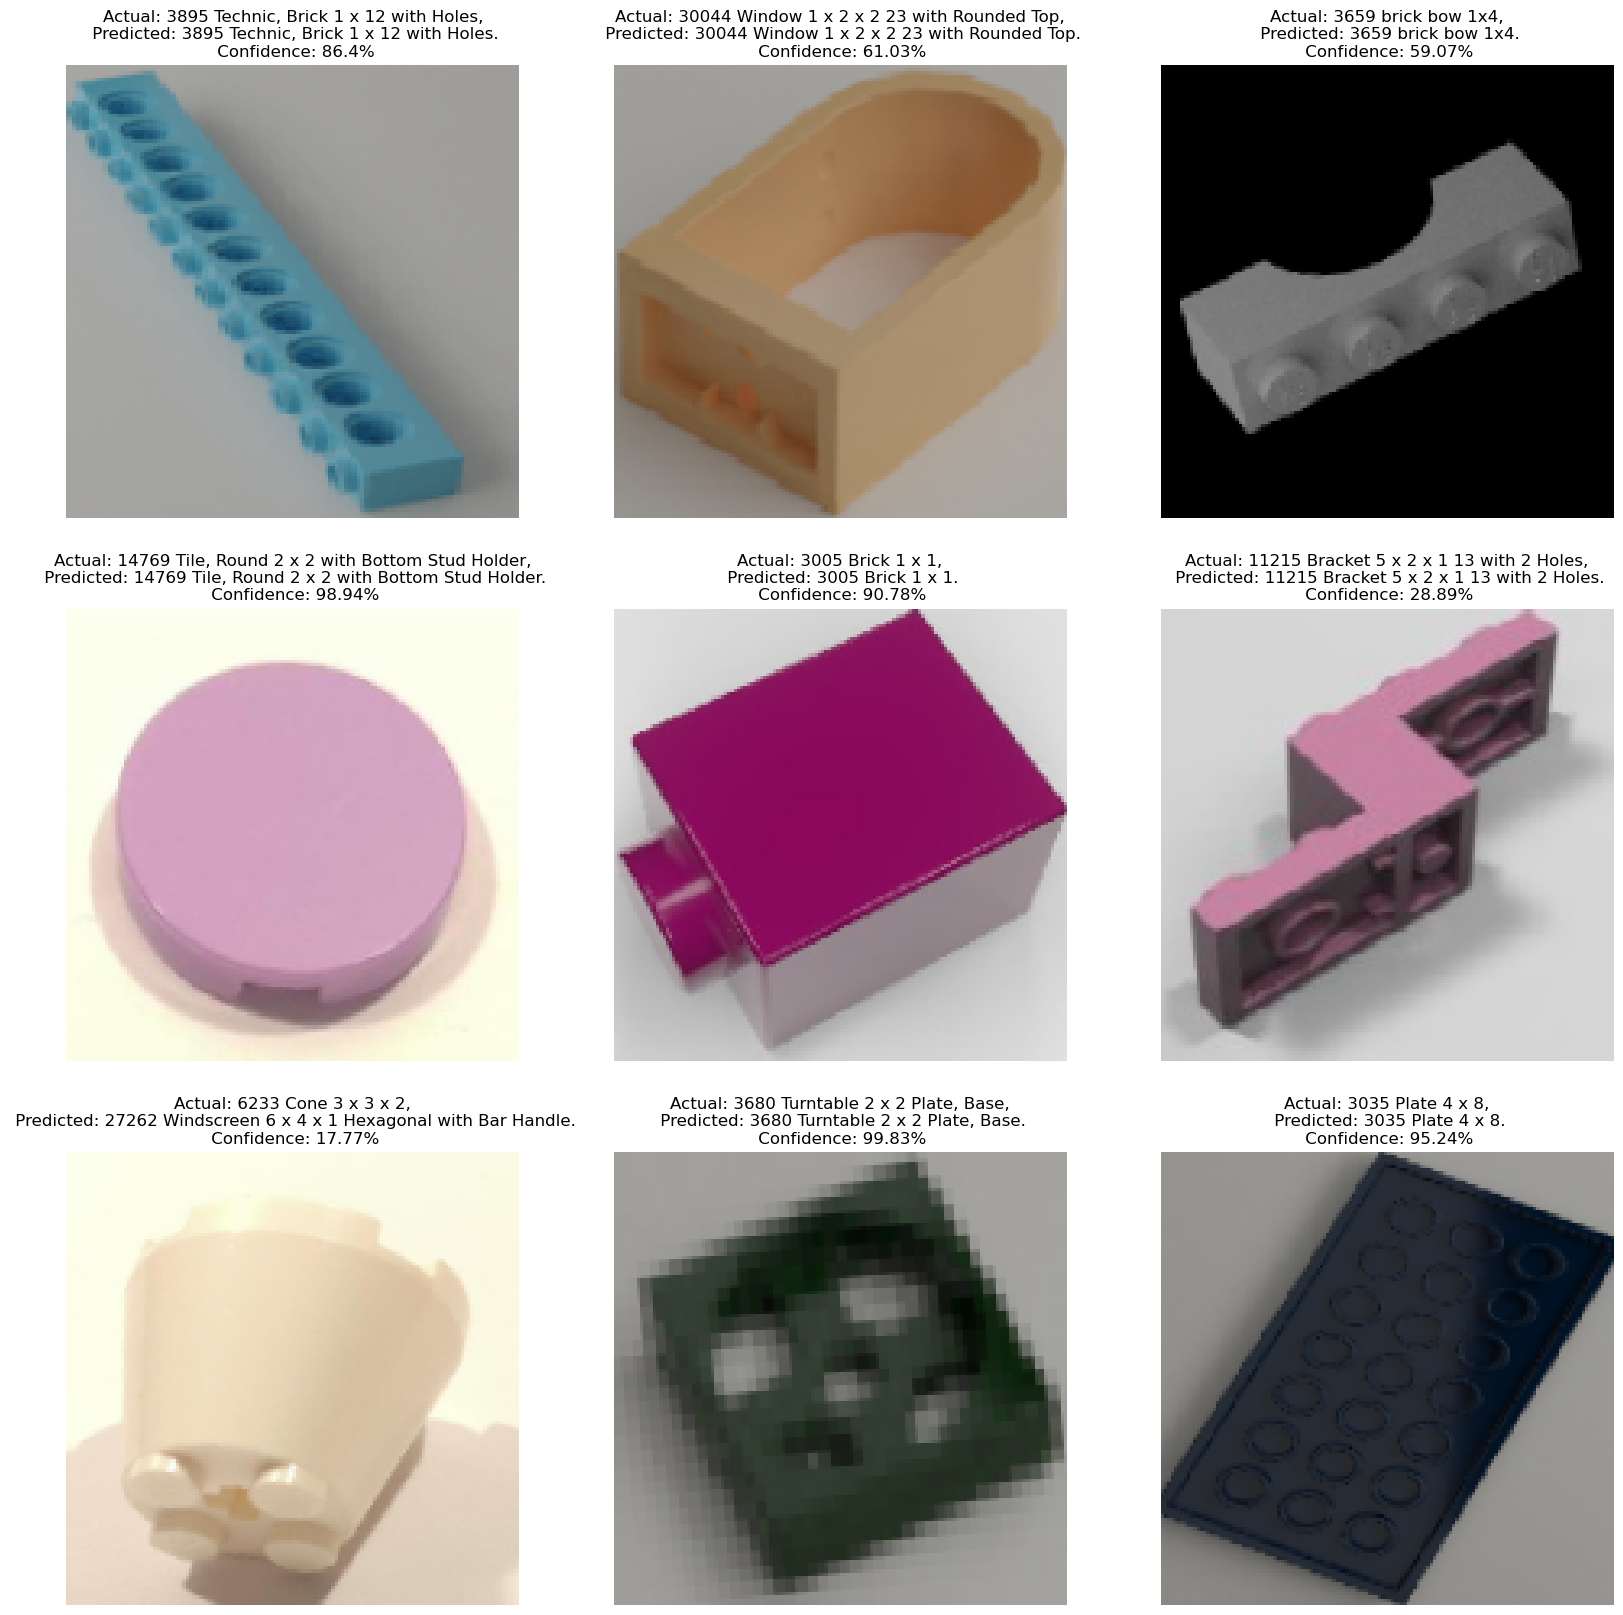

In [33]:
plt.figure(figsize=(20, 20))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break


In [28]:
model.save("./Bricks300.h5")

/opt/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
import os
model_version="300Bricks"
model.save(f"./Models/{model_version}")

INFO:tensorflow:Assets written to: ./Models/300Bricks/assets


INFO:tensorflow:Assets written to: ./Models/300Bricks/assets


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

# 获取测试集上的预测结果


predictions = model.predict(test_generator,steps=len(test_generator), verbose=1)
y_true = []
y_pred = []

# 将测试集中的真实标签和预测结果收集起来

y_true.extend(labels)
y_pred.extend(tf.argmax(model.predict(images), axis=1).numpy())


# 计算混淆矩阵
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix

1/1 [==============================] - 0s 23ms/step


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [39]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [40]:
import seaborn as sns

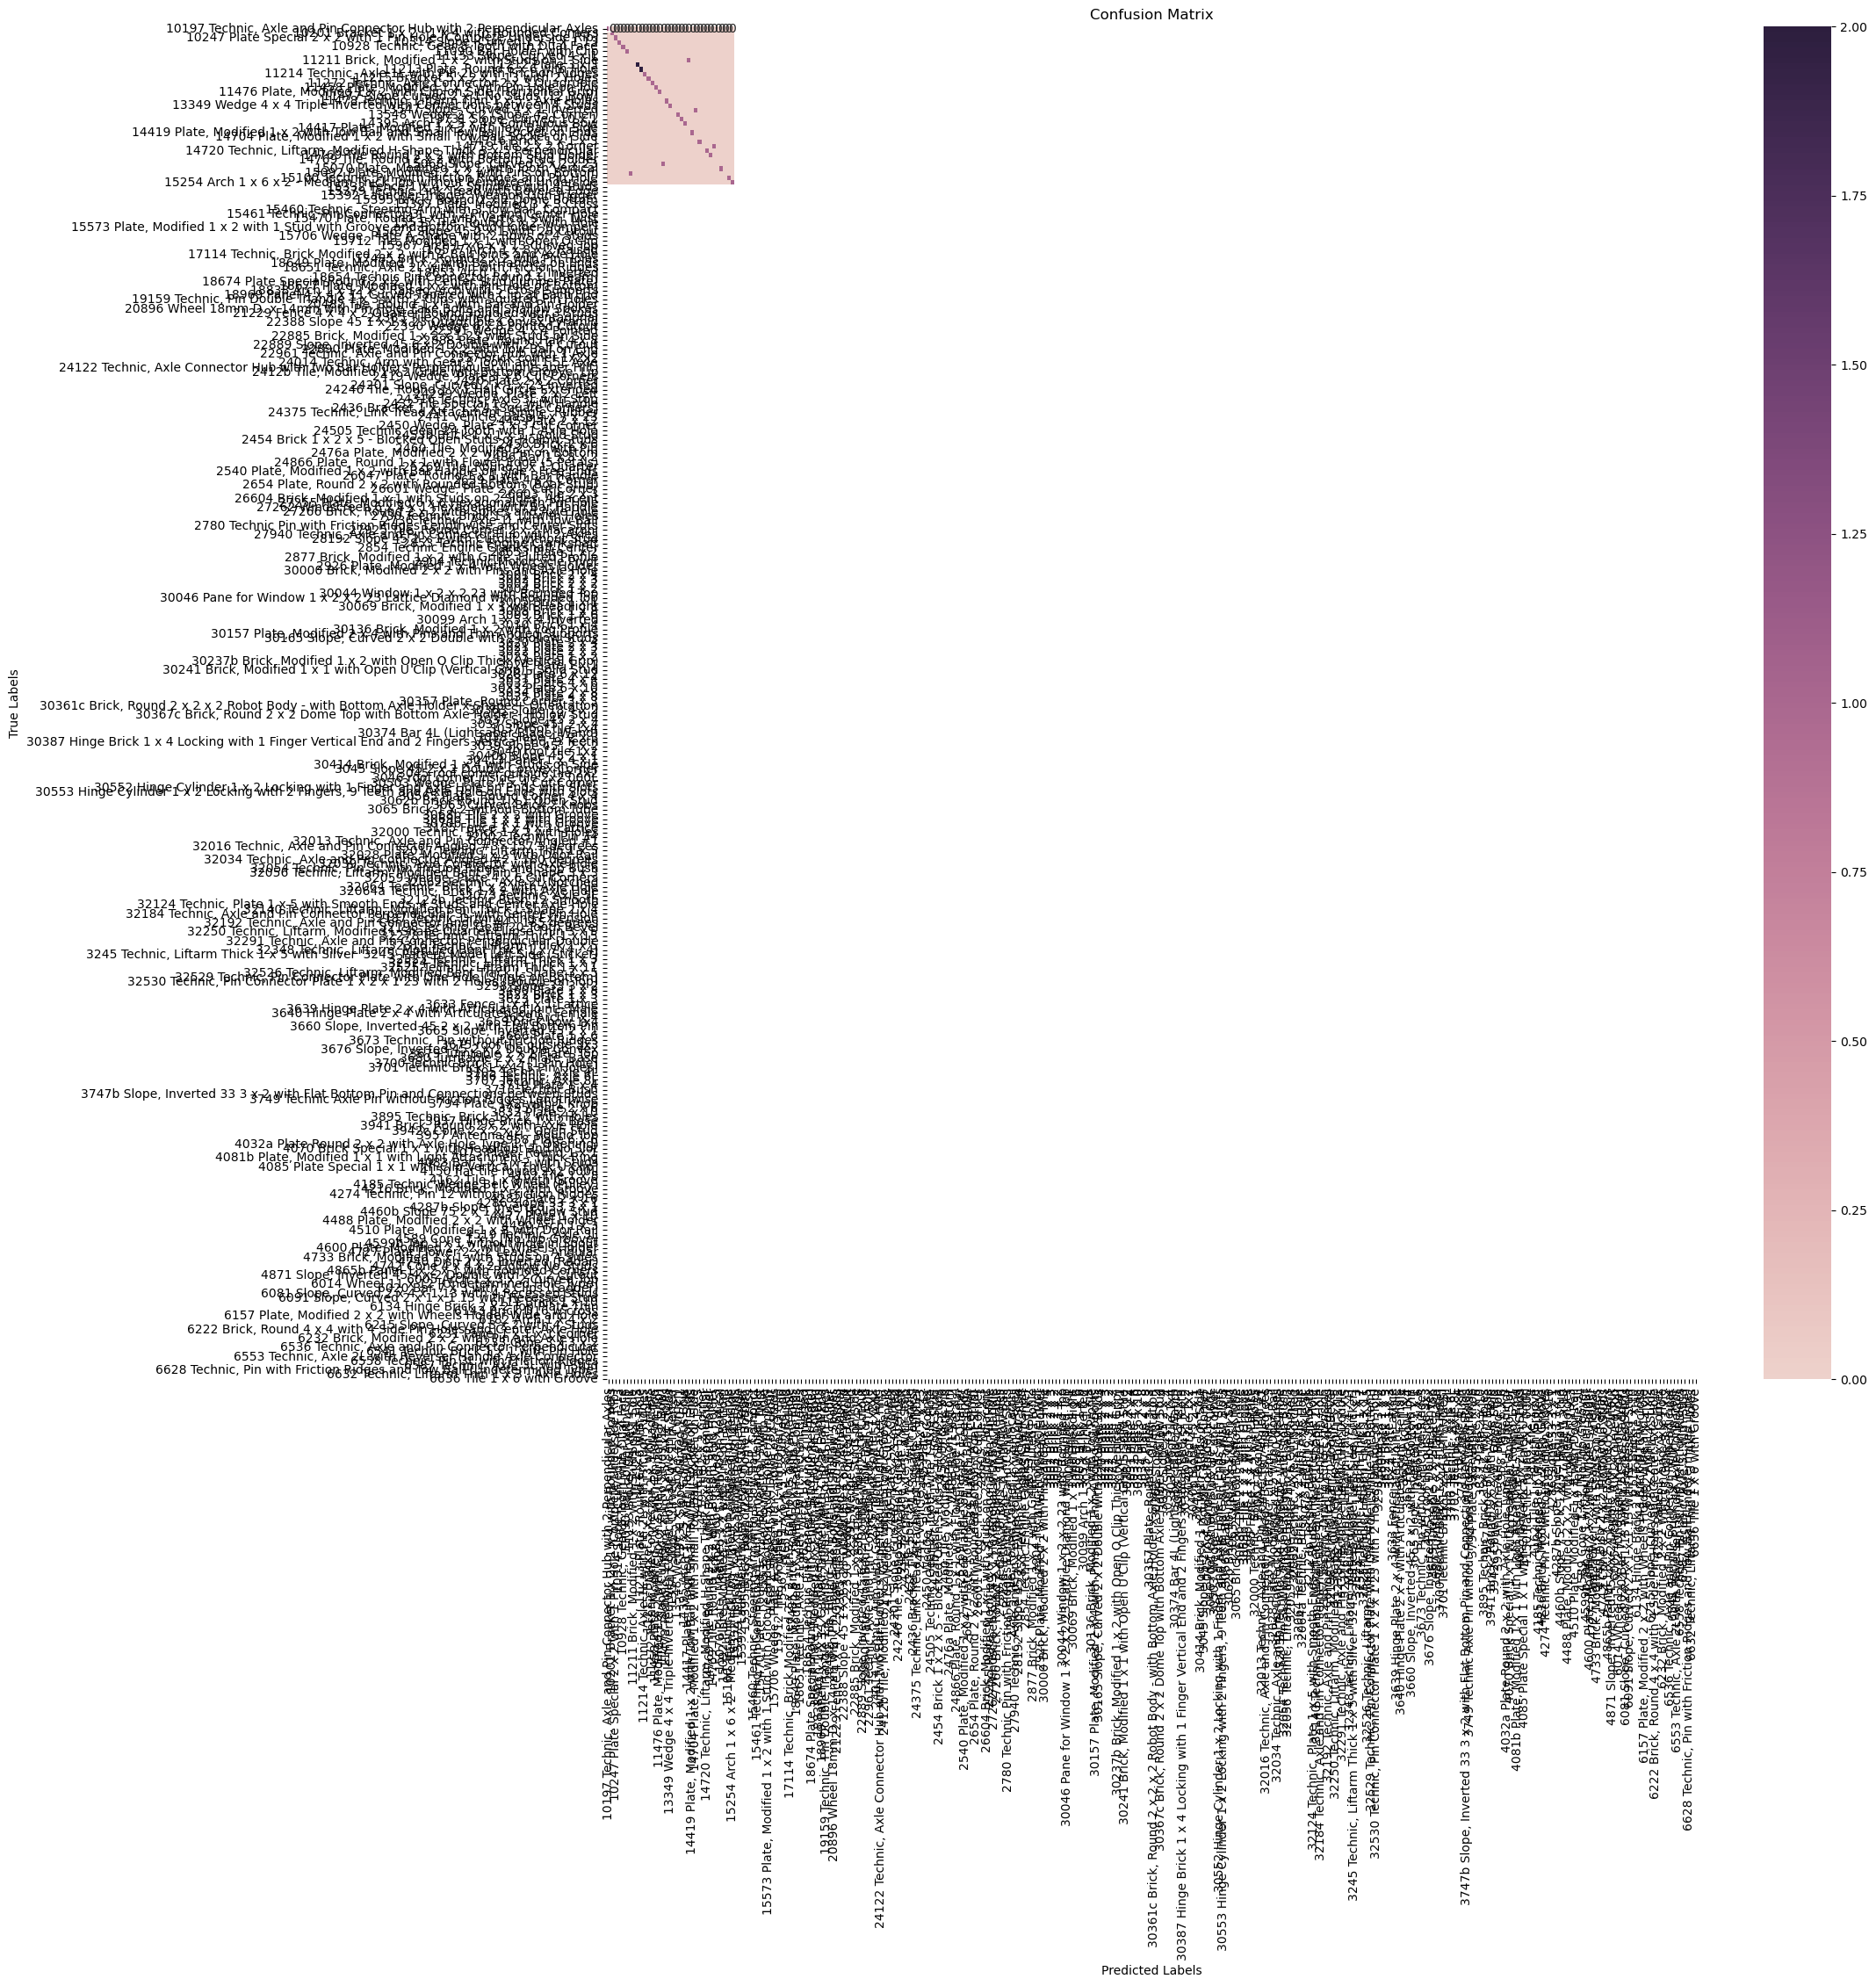

In [43]:
plt.figure(figsize=(20, 20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [44]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')


In [45]:
# Calculate class-wise accuracy
class_accuracy = {}
for i in range(n_classes):
    true_positive = conf_matrix[i][i] if i < conf_matrix.shape[0] else 0
    total_predicted = sum(conf_matrix[i]) if i < conf_matrix.shape[0] else 0
    
    # Avoid division by zero
    if total_predicted != 0:
        class_accuracy[class_names[i]] = true_positive / total_predicted
    else:
        class_accuracy[class_names[i]] = 0  # Set accuracy to 0 for classes with no predictions

# Print class-wise accuracies
for class_name, accuracy in class_accuracy.items():
    print(f'Class: {class_name}, Accuracy: {accuracy}')

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true, y_pred)
overall_precision = precision_score(y_true, y_pred,pos_label='pos_label',average='weighted')
overall_recall = recall_score(y_true, y_pred,pos_label='pos_label',average='weighted')
overall_f1 = f1_score(y_true, y_pred,pos_label='pos_label',average='weighted')
print(f'Overall Accuracy: {overall_accuracy}')
print(f'Overall Precision: {overall_precision}')
print(f'Overall Recall: {overall_recall}')
print(f'Overall F1: {overall_f1}')

Class: 10197 Technic, Axle and Pin Connector Hub with 2 Perpendicular Axles, Accuracy: 1.0
Class: 10201 Bracket 1 x 2 - 1 x 4 with Rounded Corners, Accuracy: 1.0
Class: 10247 Plate Special 2 x 2 with 1 Pin Hole [Complete Underside Rib], Accuracy: 1.0
Class: 10314 Slope, Curved 1 x 4 x 1 13, Accuracy: 1.0
Class: 10928 Technic, Gear 8 Tooth with Dual Face, Accuracy: 1.0
Class: 11090 Bar Holder with Clip, Accuracy: 1.0
Class: 11153 Slope, Curved 4 x 1, Accuracy: 0
Class: 11211 Brick, Modified 1 x 2 with Studs on 1 Side, Accuracy: 0.0
Class: 11212 Plate 3 x 3, Accuracy: 1.0
Class: 11213 Plate, Round 6 x 6 with Hole, Accuracy: 1.0
Class: 11214 Technic, Axle 1L with Pin 2L with Friction Ridges, Accuracy: 1.0
Class: 11215 Bracket 5 x 2 x 1 13 with 2 Holes, Accuracy: 1.0
Class: 11272 Technic, Axle Connector 2 x 3 Quadruple, Accuracy: 1.0
Class: 11458 Plate, Modified 1 x 2 with Pin Hole on Top, Accuracy: 1.0
Class: 11476 Plate, Modified 1 x 2 with Clip on Side (Horizontal Grip), Accuracy: 1.0
C

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'pos_label') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'pos_label') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being se